In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]

In [2]:
data_folder = r"E:\data\gst-0815-23\Mechanism_6_use_local_optima\MutualDeviation_across_K"
gg_deviation_file = data_folder + r"\gg_mutual_deviation_across_K"
gs_deviation_file = data_folder + r"\gs_mutual_deviation_across_K"
ss_deviation_file = data_folder + r"\ss_mutual_deviation_across_K"
sg_deviation_file = data_folder + r"\sg_mutual_deviation_across_K"

with open(gg_deviation_file, 'rb') as infile:
    gg_deviation = pickle.load(infile)
with open(gs_deviation_file, 'rb') as infile:
    gs_deviation = pickle.load(infile)
with open(ss_deviation_file, 'rb') as infile:
    ss_deviation = pickle.load(infile)
with open(sg_deviation_file, 'rb') as infile:
    sg_deviation = pickle.load(infile)
print(np.array(gg_deviation).shape)
print(gg_deviation)
print(ss_deviation)

(9,)
[0.0, 0.4433689000000004, 0.6120402799999999, 0.71087962, 0.7453458800000005, 0.7655677999999999, 0.7742299799999998, 0.7734684800000002, 0.76397084]
[0.0, 0.43982517999999987, 0.6652196999999995, 0.7798513200000002, 0.8397685800000005, 0.8708531199999996, 0.88515408, 0.8900375199999995, 0.8890366399999996]


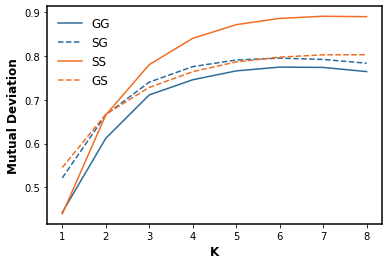

In [3]:
# GST Fitness
x = range(1, 9)
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, gg_deviation[1:], "-", label="GG", color=nature_blue)
plt.plot(x, sg_deviation[1:], "--", label="SG", color=nature_blue)

plt.plot(x, ss_deviation[1:], "-", label="SS", color=nature_orange)
plt.plot(x, gs_deviation[1:], "--", label="GS", color=nature_orange)

plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Mutual Deviation', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Mutual_Deviation_across_K.png", transparent=True, dpi=300)
plt.show()

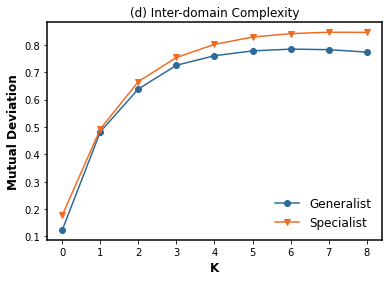

In [5]:
# Integrate Recombination for Simplification
G_deviation_across_K = []
for gg, sg in zip(gg_deviation, sg_deviation):
    new_g = 0.5 * (gg + sg)
    G_deviation_across_K.append(new_g)
S_deviation_across_K = []
for ss, gs in zip(ss_deviation, gs_deviation):
    new_s = 0.5 * (ss + gs)
    S_deviation_across_K.append(new_s)

x = range(9)
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, G_deviation_across_K, marker='o', linestyle='-', label="Generalist", color=nature_blue)
plt.plot(x, S_deviation_across_K, marker='v', linestyle='-', label="Specialist", color=nature_orange)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Mutual Deviation', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.title("(d) Inter-domain Complexity")
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Mutual_Deviation_across_K.png", transparent=True, dpi=300)
plt.show()